# Training CNN untuk Klasifikasi Kucing dan Anjing

### Arahkan colaboratory pada file project yang ingin dijalankan

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%cd gdrive/My\ Drive/cat-dog-cnn
!ls

/content/gdrive/My Drive/cat-dog-cnn
dataset  main.ipynb	    testing_photo.npy	training_photo.npy
images	 testing_label.npy  training_label.npy


### Import libraries yang dibutuhkan

In [4]:
# from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras import backend as K
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from os import listdir
from numpy import asarray
from numpy import save

from matplotlib import pyplot
from matplotlib.image import imread

Using TensorFlow backend.


### Melihat data

dataset/train/dog.1.jpg
dataset/train/dog.2.jpg
dataset/train/dog.3.jpg
dataset/train/dog.4.jpg
dataset/train/dog.5.jpg
dataset/train/dog.6.jpg
dataset/train/dog.7.jpg
dataset/train/dog.8.jpg
dataset/train/dog.9.jpg
dataset/train/dog.10.jpg
dataset/train/dog.11.jpg
dataset/train/dog.12.jpg
dataset/train/dog.13.jpg
dataset/train/dog.14.jpg
dataset/train/dog.15.jpg
dataset/train/dog.16.jpg
dataset/train/dog.17.jpg
dataset/train/dog.18.jpg
dataset/train/dog.19.jpg
dataset/train/dog.20.jpg
dataset/train/dog.21.jpg
dataset/train/dog.22.jpg
dataset/train/dog.23.jpg
dataset/train/dog.24.jpg
dataset/train/dog.25.jpg
dataset/train/dog.26.jpg
dataset/train/dog.27.jpg
dataset/train/dog.28.jpg
dataset/train/dog.29.jpg
dataset/train/dog.30.jpg


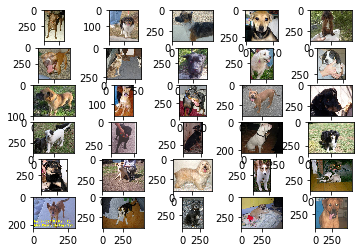

In [38]:
# define location of dataset
folder = 'dataset/train/'
# plot first few images
for i in range(1,31):
    pyplot.subplot(6, 5 , 0+i)
    filename = folder + 'dog.' + str(i) + '.jpg'
    print(filename)
    image = imread(filename)
    pyplot.imshow(image)
# show the figure
pyplot.show()

dataset/train/dog.6.jpg


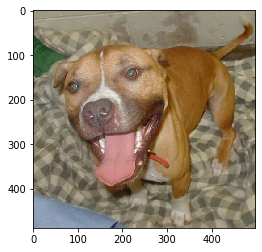

In [40]:
filename = 'dataset/train/dog.6.jpg'
print(filename)
image = imread(filename)
pyplot.imshow(image)

### Data Preprocessing

In [0]:
# Training data preprocessing
folder = 'dataset/train/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
  # print(file)
  # determine class
  output = 0.0
  if file.startswith('dog'):
    output = 1.0
  # load image
  photo = load_img(folder + file, target_size=(200, 200))
  # convert to numpy array
  photo = img_to_array(photo)
  # store
  photos.append(photo)
  labels.append(output)
# convert to a numpy arrays
training_photo = asarray(photos)
training_label = asarray(labels)
print(training_photo.shape, training_label.shape)
# save the reshaped photos
save('training_photo.npy', training_photo)
save('training_label.npy', training_label)

(60, 200, 200, 3) (60,)


In [0]:
# Testing data preprocessing
folder = 'dataset/test/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
  # print(file)
  # determine class
  output = 0.0
  if file.startswith('dog'):
    output = 1.0
  # load image
  photo = load_img(folder + file, target_size=(200, 200))
  # convert to numpy array
  photo = img_to_array(photo)
  # store
  photos.append(photo)
  labels.append(output)
# convert to a numpy arrays
testing_photo = asarray(photos)
testing_label = asarray(labels)
print(testing_photo.shape, testing_label.shape)
# save the reshaped photos
save('testing_photo.npy', testing_photo)
save('testing_label.npy', testing_label)

(10, 200, 200, 3) (10,)


In [9]:
# load and confirm the shape
from numpy import load

x_train = load('training_photo.npy')
y_train = load('training_label.npy')

x_test = load('testing_photo.npy')
y_test = load('testing_label.npy')

print('Training data', x_train.shape, y_train.shape)
print('Testing data', x_test.shape, y_test.shape)

Training data (60, 200, 200, 3) (60,)
Testing data (10, 200, 200, 3) (10,)


In [10]:
batch_size = 20
num_classes = 2
epochs = 7

# input image dimensions
img_rows, img_cols = 200, 200
input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60, 200, 200, 3)
60 train samples
10 test samples


### Mendesain arsitektur dan pengaturan pada layer deep learning

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Train on 60 samples, validate on 10 samples
Epoch 1/7
60/60 [==============================] - 2s 35ms/step - loss: 5.5345 - acc: 0.4833 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/7
60/60 [==============================] - 1s 9ms/step - loss: 6.8711 - acc: 0.4833 - val_loss: 1.8725 - val_acc: 0.3000
Epoch 3/7
60/60 [==============================] - 1s 9ms/step - loss: 4.3513 - acc: 0.6000 - val_loss: 6.6653 - val_acc: 0.5000
Epoch 4/7
60/60 [==============================] - 1s 9ms/step - loss: 6.3641 - acc: 0.3833 - val_loss: 0.6791 - val_acc: 0.6000
Epoch 5/7
60/60 [==============================] - 1s 9ms/step - loss: 2.2545 - acc: 0.6000 - val_loss: 0.8164 - val_acc: 0.6000
Epoch 6/7
60/60 [==============================] - 1s 9ms/step - loss: 1.1060 - acc: 0.5833 - val_loss: 0.5761 - val_acc: 0.7000
Epoch 7/7
60/60 [==============================] - 1s 9ms/step - loss: 0.3090 - acc: 0.8833 - val_loss: 0.5419 - val_acc: 0.6000
Test loss: 0.5418893694877625
Test accuracy: 0.60000

### Save model

In [0]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

### Load model

In [0]:
from keras.models import load_model
# returns a compiled model identical to the previous one
model = load_model('my_model.h5')

In [25]:
photos = list()
photo = load_img('images/dog.35.jpg', target_size=(200, 200))
photos.append(img_to_array(photo))
predictor = asarray(photos)
y = model.predict_classes(predictor)

array([1])